In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [2]:
inpatient = pd.read_csv("C:\\Users\\HP\\Downloads\\(Class 9-Python - Case Study)\\End to End\\Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv")
outpatient = pd.read_csv("C:\\Users\\HP\\Downloads\\(Class 9-Python - Case Study)\\End to End\\Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv")

In [3]:
inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
DRG Definition                                163065 non-null object
Provider Id                                   163065 non-null int64
Provider Name                                 163065 non-null object
Provider Street Address                       163065 non-null object
Provider City                                 163065 non-null object
Provider State                                163065 non-null object
Provider Zip Code                             163065 non-null int64
Hospital Referral Region (HRR) Description    163065 non-null object
Total Discharges                              163065 non-null int64
Average Covered Charges                       163065 non-null float64
Average Total Payments                        163065 non-null float64
Average Medicare Payments                     163065 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 14.9+ M

In [4]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


In [5]:
inpatient.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.958434,9707.477867,8494.495174
std,151563.671767,27854.323080,51.104042,35065.365905,7664.642652,7309.467247
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.909091
25%,110092.000000,27261.000000,17.000000,15947.166670,5234.500000,4192.354839
50%,250007.000000,44309.000000,27.000000,25245.823530,7214.100000,6158.465116
75%,380075.000000,72901.000000,49.000000,43232.592590,11286.400000,10056.882350
max,670077.000000,99835.000000,3383.000000,929118.909100,156158.181800,154620.818200


In [6]:
outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
APC                                           43372 non-null object
Provider Id                                   43372 non-null int64
Provider Name                                 43372 non-null object
Provider Street Address                       43372 non-null object
Provider City                                 43372 non-null object
Provider State                                43372 non-null object
Provider Zip Code                             43372 non-null int64
Hospital Referral Region (HRR) Description    43372 non-null object
Outpatient Services                           43372 non-null int64
Average  Estimated Submitted Charges          43372 non-null float64
Average Total Payments                        43372 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 3.6+ MB


## Identify providers that overcharge for certain procedures or regions where procedures are too expensive.

Part1: A: Highest Cost Variation

For inpatients

In [7]:
a = inpatient[['DRG Definition','Provider State','Average Medicare Payments']]

In [8]:
amax = a.loc[a.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop = True)

In [9]:
amax

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK,6413.782609
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,5858.500000
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR,8533.833333
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ,9056.066667
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA,11483.407410
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CO,6658.272727
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CT,8252.260870
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DC,8871.000000
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DE,6071.211111
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,FL,7588.529412


In [10]:
amin = a.loc[a.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmin()].reset_index(drop = True)

amin

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK,6413.782609
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,3898.888889
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR,4068.106061
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ,3592.857143
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA,5009.941176
5,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CO,4589.280000
6,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CT,5695.791667
7,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DC,6781.318182
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,DE,5536.219512
9,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,FL,3892.480000


In [11]:
b = amax.copy()
b['Variation'] = amax['Average Medicare Payments'] - amin['Average Medicare Payments']
b.drop(columns = 'Average Medicare Payments' , inplace = True)
b.loc[b.groupby(['DRG Definition'])['Variation'].idxmax()].head()

,DRG Definition,Provider State,Variation
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,11506.646106
55,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,CA,18335.419643
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,40323.965461
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,17437.811237
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,9972.780745


For outpatient

In [12]:
a = outpatient[['APC','Provider State','Average Total Payments']]

In [13]:
amax = a.loc[a.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop = True)

In [14]:
amin = a.loc[a.groupby(['APC','Provider State'])['Average Total Payments'].idxmin()].reset_index(drop = True)

In [15]:
b = amax.copy()
b['Variation'] = amax['Average Total Payments'] - amin['Average Total Payments']
b.drop(columns = 'Average Total Payments' , inplace = True)
b.loc[b.groupby(['APC'])['Variation'].idxmax()].head()

,APC,Provider State,Variation
20,0012 - Level I Debridement & Destruction,MI,20.593261
51,0013 - Level II Debridement & Destruction,CA,47.025556
101,0015 - Level III Debridement & Destruction,CA,83.536505
175,0019 - Level I Excision/ Biopsy,NY,180.010667
194,0020 - Level II Excision/ Biopsy,CA,296.625625


Part1: B: Highest-Cost Claims by Provider

For inpatient

In [16]:
c = inpatient[['DRG Definition','Provider Id','Average Medicare Payments']]

c.head()

,DRG Definition,Provider Id,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,4851.444444


In [17]:
cmax = c.loc[c.groupby(['DRG Definition','Provider Id'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)

In [18]:
c1 = cmax.loc[cmax.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()]

In [19]:
c1.head()

,DRG Definition,Provider Id,Average Medicare Payments
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,15855.18182
1554,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,210009,22873.49398
2986,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,210009,48632.28125
4156,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,23402.26316
6365,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,50228,13710.23529


For Outpatients

In [20]:
c = outpatient[['APC','Provider Id','Average Total Payments']]

In [21]:
cmax = c.loc[c.groupby(['APC','Provider Id'])['Average Total Payments'].idxmax()].reset_index(drop=True)

In [22]:
c1 = cmax.loc[cmax.groupby(['APC'])['Average Total Payments'].idxmax()]

In [23]:
c1.head()

,APC,Provider Id,Average Total Payments
1,0012 - Level I Debridement & Destruction,20024,36.623853
424,0013 - Level II Debridement & Destruction,50334,85.930000
1874,0015 - Level III Debridement & Destruction,50153,142.186505
3322,0019 - Level I Excision/ Biopsy,50002,470.720000
3837,0020 - Level II Excision/ Biopsy,50153,808.850000


Part1: C: Highest-Cost Claims by Region

For inpatients

In [24]:
d = inpatient[['DRG Definition','Provider State','Average Medicare Payments']]

d.head()

,DRG Definition,Provider State,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4851.444444


In [25]:
dmax = d.loc[d.groupby(['DRG Definition','Provider State'])['Average Medicare Payments'].idxmax()].reset_index(drop=True)

In [26]:
dmax.loc[dmax.groupby(['DRG Definition'])['Average Medicare Payments'].idxmax()].head()

,DRG Definition,Provider State,Average Medicare Payments
20,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,MD,15855.18182
71,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,MD,22873.49398
122,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,MD,48632.28125
157,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,23402.26316
208,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,CA,13710.23529


For Outpatients

In [27]:
d = outpatient[['APC','Provider State','Average Total Payments']]

In [28]:
dmax = d.loc[d.groupby(['APC','Provider State'])['Average Total Payments'].idxmax()].reset_index(drop=True)

In [29]:
dmax.loc[dmax.groupby(['APC'])['Average Total Payments'].idxmax()].head()

,APC,Provider State,Average Total Payments
0,0012 - Level I Debridement & Destruction,AK,36.623853
51,0013 - Level II Debridement & Destruction,CA,85.930000
101,0015 - Level III Debridement & Destruction,CA,142.186505
150,0019 - Level I Excision/ Biopsy,CA,470.720000
194,0020 - Level II Excision/ Biopsy,CA,808.850000


Part1: D: Highest Number of Procedures and Largest Differences between Claims and Reimbursements

For inpatients

In [30]:
e = inpatient[['DRG Definition','Provider State','Total Discharges','Average Total Payments','Average Medicare Payments']]

e.head()

,DRG Definition,Provider State,Total Discharges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,91,5777.241758,4763.736264
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,14,5787.571429,4976.714286
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,24,5434.958333,4453.791667
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,25,5417.560000,4129.160000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,18,5658.333333,4851.444444


In [31]:
#DPC = Difference between Average Total Payments and Average Medicare Payments per discharge

e['DPC']=(e['Average Total Payments'] - e['Average Medicare Payments']) / e['Total Discharges']

e.drop(['Total Discharges','Average Total Payments','Average Medicare Payments'] , axis = 1 , inplace = True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
emax = e.loc[e.groupby(['DRG Definition','Provider State'])['DPC'].idxmax()].reset_index(drop=True)

In [33]:
emax.loc[emax.groupby(['DRG Definition'])['DPC'].idxmax()].head()

,DRG Definition,Provider State,DPC
14,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,IL,876.167969
66,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,IN,314.899408
116,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,IL,1020.664062
164,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,HI,1410.236111
235,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NJ,437.876033


For outpatient

In [34]:
e = outpatient[['APC','Provider State','Outpatient Services','Average  Estimated Submitted Charges','Average Total Payments']]

In [35]:
#DPO=Difference between Average Total Payments and Average Estimated Submitted Charges per outservice

e['DPO'] = (e['Average  Estimated Submitted Charges'] - e['Average Total Payments']) / e['Outpatient Services']
e.drop(['Outpatient Services','Average Total Payments','Average  Estimated Submitted Charges'] , axis = 1 , inplace = True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
emax = e.loc[e.groupby(['APC','Provider State'])['DPO'].idxmax()].reset_index(drop=True)

In [37]:
emax.loc[emax.groupby(['APC'])['DPO'].idxmax()].head()

,APC,Provider State,DPO
27,0012 - Level I Debridement & Destruction,NE,55.162667
48,0013 - Level II Debridement & Destruction,AL,398.107692
118,0015 - Level III Debridement & Destruction,MI,233.392562
150,0019 - Level I Excision/ Biopsy,CA,2172.817083
234,0020 - Level II Excision/ Biopsy,VA,1350.947190


## Part 2 - Identify the three providers that are least similar to other providers and the three regions that are least similar to other regions

Part2: A: Providers Least Like Others

In [44]:
#For inpatient
a = inpatient[['Provider Id','Average Medicare Payments']].groupby('Provider Id').mean().reset_index()
a.head()

,Provider Id,Average Medicare Payments
0,10001,7678.218337
1,10005,5793.635452
2,10006,7145.964071
3,10007,4047.029737
4,10008,4963.552805


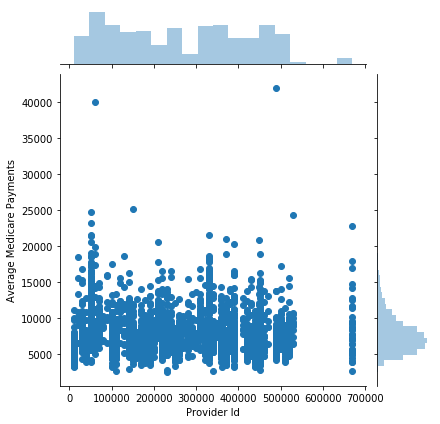

In [45]:
sns.jointplot(x='Provider Id', y='Average Medicare Payments', data=a)

In [50]:
model = LinearRegression()
model.fit(a['Provider Id'].values.reshape(-1,1) , a['Average Medicare Payments'].values.reshape(-1,1))

#using values.reshape(-1,1) to convert the variables into 2D numpy array

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
a['Predicted'] = model.predict(a['Provider Id'].values.reshape(-1,1))

In [52]:
a['Residual'] = abs(a['Predicted'] - a['Average Medicare Payments']) 

In [56]:
a.sort_values('Residual' , ascending = False).head()

,Provider Id,Average Medicare Payments,Predicted,Residual
3143,490142,41836.888890,7483.163626,34353.725264
540,60096,39943.173080,8420.791989,31522.381091
3295,530015,24350.493057,7396.228611,16954.264446
1102,150166,25098.255195,8224.412563,16873.842632
420,50528,24755.286045,8441.653079,16313.632966


In [57]:
#For outpatient
a = outpatient[['Provider Id','Average Total Payments']].groupby('Provider Id').mean().reset_index()
a.head()

,Provider Id,Average Total Payments
0,10001,285.699426
1,10005,254.564837
2,10006,221.871666
3,10007,251.371890
4,10008,207.481575


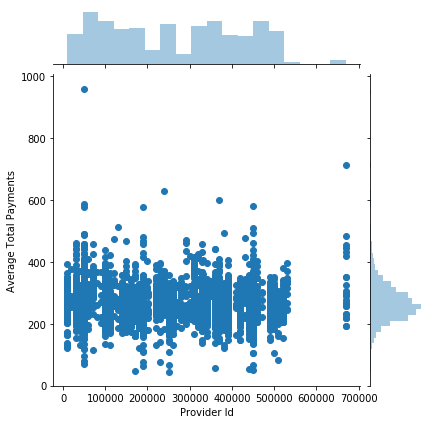

In [58]:
sns.jointplot(x='Provider Id', y='Average Total Payments', data=a)

In [59]:
model = LinearRegression()
model.fit(a['Provider Id'].values.reshape(-1,1) , a['Average Total Payments'].values.reshape(-1,1))

#using values.reshape(-1,1) to convert the variables into 2D numpy array

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
a['Predicted'] = model.predict(a['Provider Id'].values.reshape(-1,1))

In [61]:
a['Residual'] = abs(a['Predicted'] - a['Average Total Payments']) 

In [62]:
a.sort_values('Residual' , ascending = False).head()

,Provider Id,Average Total Payments,Predicted,Residual
432,50714,960.595632,275.415810,685.179823
3134,670061,712.396480,252.954963,459.441517
1474,240069,629.085289,268.548781,360.536508
2211,370201,600.149984,263.829496,336.320487
2837,450875,582.238969,260.903824,321.335145


Part2: B: Regions Least Like Others

In [63]:
#For inpatient
b = inpatient[['Provider State','Average Medicare Payments']].groupby('Provider State').mean().reset_index()

b.head()

,Provider State,Average Medicare Payments
0,AK,12958.973677
1,AL,6418.011329
2,AR,6919.725054
3,AZ,8825.721445
4,CA,11494.385763


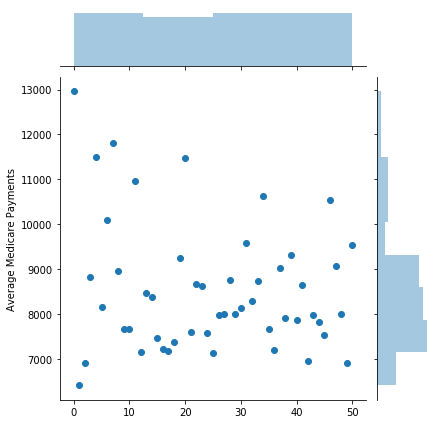

In [65]:
sns.jointplot(x=b.index, y='Average Medicare Payments', data=b)

In [67]:
model = LinearRegression()
model.fit(b.index.values.reshape(-1,1) , b['Average Medicare Payments'].values.reshape(-1,1))

#using values.reshape(-1,1) to convert the variables into 2D numpy array

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
b['Predicted']=model.predict(b.index.values.reshape(-1,1))

In [ ]:
b['Residual']=abs(b['Predicted']-b['Average Medicare Payments'])

In [69]:
b.sort_values('Residual',ascending=False).head(3)

,Provider State,Average Medicare Payments,Predicted,Residual
0,AK,12958.973677,8960.607913,3998.365764
7,DC,11811.972137,8843.385320,2968.586816
20,MD,11480.126155,8625.686221,2854.439934


In [71]:
#For outpatient
b = outpatient[['Provider State','Average Total Payments']].groupby('Provider State').mean().reset_index()

b.head()

,Provider State,Average Total Payments
0,AK,288.362928
1,AL,267.136711
2,AR,237.373479
3,AZ,277.899929
4,CA,297.771481


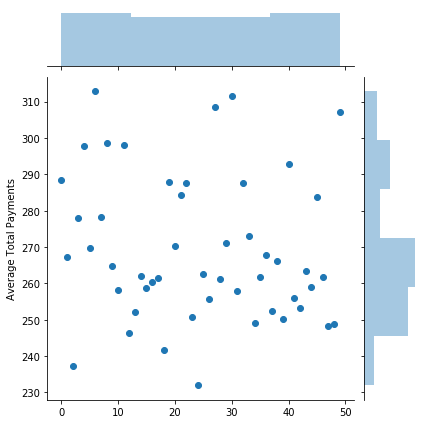

In [72]:
sns.jointplot(x=b.index, y='Average Total Payments', data=b)

In [73]:
model = LinearRegression()
model.fit(b.index.values.reshape(-1,1) , b['Average Total Payments'].values.reshape(-1,1))

#using values.reshape(-1,1) to convert the variables into 2D numpy array

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
b['Predicted']=model.predict(b.index.values.reshape(-1,1))

In [75]:
b['Residual']=abs(b['Predicted']-b['Average Total Payments'])

In [76]:
b.sort_values('Residual',ascending=False).head(3)

,Provider State,Average Total Payments,Predicted,Residual
30,NJ,311.496332,268.030556,43.465776
49,WY,307.213348,264.300992,42.912357
6,CT,312.802783,272.741585,40.061198


Part3: Identify 10000 Medicare patients who are involved in anomalous activities.

In [2]:
history = pd.read_csv("C:\\Users\\HP\\Downloads\\(Class 9-Python - Case Study)\\End to End\\Patient_history_samp.csv")
trans=pd.read_csv("C:\\Users\\HP\\Downloads\\(Class 9-Python - Case Study)\\End to End\\Transaction_coo.csv")

In [3]:
history

,id,age,gender,income
0,306535165,65-74,F,24000-31999
1,742231134,65-74,F,48000+
2,928807201,75-84,M,24000-31999
3,83686538,<65,F,32000-47999
4,755607449,65-74,F,48000+
5,247750664,75-84,F,<16000
6,141100339,<65,M,32000-47999
7,547433468,<65,M,32000-47999
8,719408667,65-74,F,16000-23999
9,769089007,75-84,M,32000-47999


In [4]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
id        500000 non-null int64
age       497470 non-null object
gender    500000 non-null object
income    497469 non-null object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [5]:
#We have null values in 2 columns
#fixing them with modes

history.age.fillna(history.age.mode()[0] , inplace = True)
history.income.fillna(history.income.mode()[0] , inplace = True)

In [6]:
history.info()

#Now we do not have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
id        500000 non-null int64
age       500000 non-null object
gender    500000 non-null object
income    500000 non-null object
dtypes: int64(1), object(3)
memory usage: 15.3+ MB


In [7]:
history.describe()

,id
count,5.000000e+05
mean,5.001562e+08
std,2.884206e+08
min,7.561000e+03
25%,2.505402e+08
50%,5.001085e+08
75%,7.495556e+08
max,9.999957e+08


In [8]:
trans

,id,global_proc_id,count
0,159125,1,1
1,191852,1,1
2,321083,1,1
3,383037,1,1
4,467729,1,1
5,655043,1,1
6,716428,1,1
7,755048,1,1
8,793895,1,1
9,1012650,1,1


In [9]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514809 entries, 0 to 1514808
Data columns (total 3 columns):
id                1514809 non-null int64
global_proc_id    1514809 non-null int64
count             1514809 non-null int64
dtypes: int64(3)
memory usage: 34.7 MB


In [10]:
trans.describe()

,id,global_proc_id,count
count,1.514809e+06,1.514809e+06,1514809.0
mean,5.000708e+08,3.847588e+01,1.0
std,2.883678e+08,3.123966e+01,0.0
min,7.561000e+03,1.000000e+00,1.0
25%,2.504427e+08,2.200000e+01,1.0
50%,4.999363e+08,2.600000e+01,1.0
75%,7.493563e+08,4.200000e+01,1.0
max,9.999957e+08,1.300000e+02,1.0


In [11]:
history.set_index('id',inplace=True)

In [12]:
trans = trans[['id','count']].groupby('id').sum()

In [13]:
#Merging the both datasets

transaction = pd.merge(history , trans , how = 'inner' , left_on = history.index , right_on = trans.index)

In [14]:
transaction.rename(columns = {'key_0' : 'id'} , inplace = True)

transaction.set_index('id',inplace=True)

In [15]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 306535165 to 385254439
Data columns (total 4 columns):
age       500000 non-null object
gender    500000 non-null object
income    500000 non-null object
count     500000 non-null int64
dtypes: int64(1), object(3)
memory usage: 19.1+ MB


In [16]:
transaction.describe()

,count
count,500000.000000
mean,2.999536
std,1.416457
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,13.000000


In [17]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [18]:
for c_feature in ['age','gender','income']:
    transaction[c_feature] = transaction[c_feature].astype('category')
    transaction = create_dummies(transaction, c_feature)

In [19]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 306535165 to 385254439
Data columns (total 9 columns):
count                 500000 non-null int64
age_75-84             500000 non-null uint8
age_85+               500000 non-null uint8
age_<65               500000 non-null uint8
gender_M              500000 non-null uint8
income_24000-31999    500000 non-null uint8
income_32000-47999    500000 non-null uint8
income_48000+         500000 non-null uint8
income_<16000         500000 non-null uint8
dtypes: int64(1), uint8(8)
memory usage: 11.4 MB


In [20]:
x_scaled = StandardScaler().fit_transform(transaction)

#Standardizing the data

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
x = pd.DataFrame(x_scaled)

In [22]:
x.columns = transaction.columns

In [23]:
x.index = transaction.index

In [24]:
y = LocalOutlierFactor(n_neighbors=50 , n_jobs = -1 , contamination = 0.002)

In [25]:
z = y.fit_predict(x)

In [27]:
label = pd.DataFrame(z)
label.index = x.index

In [29]:
label.columns = ['label']

In [35]:
req = x[label.label==-1]

In [36]:
req

#Required list of people

,count,age_75-84,age_85+,age_<65,gender_M,income_24000-31999,income_32000-47999,income_48000+,income_<16000
id,,,,,,,,,
886838603,3.530264,-0.589644,2.596578,-0.451183,-0.906319,-0.422289,-0.487149,-0.557009,1.910315
59592488,4.236251,-0.589644,2.596578,-0.451183,-0.906319,-0.422289,-0.487149,-0.557009,-0.523474
193686893,4.236251,-0.589644,-0.385122,2.216394,-0.906319,-0.422289,-0.487149,1.795304,-0.523474
197304242,3.530264,1.695939,-0.385122,-0.451183,-0.906319,-0.422289,2.052759,-0.557009,-0.523474
915344142,3.530264,-0.589644,2.596578,-0.451183,-0.906319,-0.422289,-0.487149,1.795304,-0.523474
129208819,3.530264,-0.589644,2.596578,-0.451183,-0.906319,-0.422289,-0.487149,-0.557009,1.910315
190498695,3.530264,-0.589644,2.596578,-0.451183,1.103364,-0.422289,-0.487149,-0.557009,-0.523474
668470696,4.942239,-0.589644,-0.385122,-0.451183,1.103364,-0.422289,-0.487149,-0.557009,1.910315
256667282,3.530264,-0.589644,2.596578,-0.451183,-0.906319,-0.422289,-0.487149,-0.557009,-0.523474
